# Анализ полученных фич

с использованием модуля feature_selector
https://proglib.io/p/feature-selector/

In [11]:
from feature_selector import FeatureSelector
import pandas as pd

In [12]:
#загружаем датасет
data = pd.read_csv('data4ml_4.csv')
data_source = pd.read_csv('data.csv')

In [13]:
columns = list(set(data.columns) - set(['target']))
X = data[columns]
y = data['target']

columns_source = list(set(data_source.columns) - set(['target']))
X_source = data_source[columns_source]
y_source = data_source['target']

In [14]:
# Признаки - в train, метки - в train_labels
fs = FeatureSelector(data = X, labels = y)
fs_source = FeatureSelector(data = X_source, labels = y_source)

## Пропущенные значения

In [15]:
print('Обработанный датасет')
fs.identify_missing(missing_threshold = 0.6)
print('Исходный датасет')
fs_source.identify_missing(missing_threshold = 0.6)

Обработанный датасет
0 features with greater than 0.60 missing values.

Исходный датасет
4 features with greater than 0.60 missing values.



In [16]:
#посмотрим, в каких столбцах исходного датасета много пропущенных значений
fs_source.missing_stats.head(4)

,missing_fraction
private pool,0.988915
mls-id,0.933873
PrivatePool,0.893127
fireplace,0.726620


### Вывод
Удалять данные столбцы не нужно, так как в них пропущенные значения говорят о том, что эта характеристика отсутствует в доме.
Все пропущенные значения обработаны

## Коллинеарные признаки

In [17]:
print('Обработанный датасет')
fs.identify_collinear(correlation_threshold = 0.98)
print('Исходный датасет')
fs_source.identify_collinear(correlation_threshold = 0.98)

Обработанный датасет
8 features with a correlation magnitude greater than 0.98.

Исходный датасет
0 features with a correlation magnitude greater than 0.98.



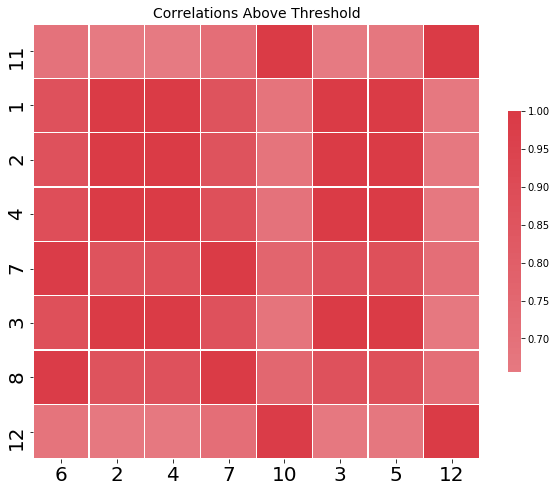

In [18]:
#Посмотрим на то, какие же признаки в обработанном датасете слишком взаимосвязаны
fs.plot_collinear()

### Вывод
В исходном датасете определить взаимосвязь признаков нельзя, так как они представляют собой не числовые данные
В обработанном датасете получились сильно взаимосвязаны данные по классам школ, что логично, так как школы все-таки содержат в себе несколько классов обучения.
Удалять столбцы не будем.

## Признаки с нулевой важностью

In [19]:
fs.identify_zero_importance(task = 'regression', 
                            eval_metric = 'l2', 
                            n_iterations = 10, 
                            early_stopping = False)

zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model


0 features with zero importance after one-hot encoding.



In [20]:
zero_importance_features

[]

## Признаки с низкой важностью

In [21]:
fs.identify_low_importance(cumulative_importance = 0.99)

34 features required for cumulative importance of 0.99 after one hot encoding.
10 features do not contribute to cumulative importance of 0.99.



In [22]:
#эти признаки предлагается удалить (10 штук)
fs.feature_importances.tail(10)

,feature,importance,normalized_importance,cumulative_importance
34,Heating,56.0,0.001867,0.990600
35,5,51.0,0.001700,0.992300
36,rent_sale,47.0,0.001567,0.993867
37,7,42.0,0.001400,0.995267
38,9,35.0,0.001167,0.996433
39,fp_count,35.0,0.001167,0.997600
40,10,27.0,0.000900,0.998500
41,2,17.0,0.000567,0.999067
42,4,15.0,0.000500,0.999567
43,3,13.0,0.000433,1.000000


In [23]:
#удалим признаки и сохраним новый датасет в отдельный файл
train_removed = fs.remove(methods = ['low_importance'])
train_removed['target'] = y

Removed 10 features.


In [24]:
train_removed.to_csv('data4ml_5.csv', encoding='utf-8', index=False)

In [25]:
train_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374347 entries, 0 to 374346
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   1                    374347 non-null  float64
 1   K                    374347 non-null  float64
 2   min_dist             374347 non-null  float64
 3   Remodeled            374347 non-null  int64  
 4   state_mean           374347 non-null  float64
 5   street_hash          374347 non-null  int64  
 6   new_id               374347 non-null  int64  
 7   prop_type            374347 non-null  int64  
 8   schools_count        374347 non-null  float64
 9   max_dist             374347 non-null  float64
 10  11                   374347 non-null  float64
 11  zipcode_int          374347 non-null  int64  
 12  mean_dist            374347 non-null  float64
 13  address_hash         374347 non-null  int64  
 14  sqft                 374347 non-null  int64  
 15  8                